### Business Goal:

Build a predictive model to identify who would churn.

In [2]:
import pandas as pd
raw_df=pd.read_excel(r"D:\Business Analytics\Important files\Logistical regression\telco.xlsx")

In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerID       7032 non-null   object 
 1   gender           7032 non-null   object 
 2   SeniorCitizen    7032 non-null   int64  
 3   Dependents       7032 non-null   object 
 4   tenure           7032 non-null   int64  
 5   InternetService  7032 non-null   object 
 6   PaymentMethod    7032 non-null   object 
 7   TotalCharges     7032 non-null   float64
 8   Churn            7032 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 494.6+ KB


In [4]:
raw_df.head()

,customerID,gender,SeniorCitizen,Dependents,tenure,InternetService,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,0,No,1,DSL,Electronic check,29.85,0
1,7795-CFOCW,Male,0,No,45,DSL,Bank transfer (automatic),1840.75,0
2,9237-HQITU,Female,0,No,2,Fiber optic,Electronic check,151.65,1
3,9305-CDSKC,Female,0,No,8,Fiber optic,Electronic check,820.50,1
4,1452-KIOVK,Male,0,Yes,22,Fiber optic,Credit card (automatic),1949.40,0


In [5]:
##------------------------------------------
##  Identify the Class Label or Y variable
##------------------------------------------
Y = raw_df.Churn.astype('category')

print(Y.info())

<class 'pandas.core.series.Series'>
RangeIndex: 7032 entries, 0 to 7031
Series name: Churn
Non-Null Count  Dtype   
--------------  -----   
7032 non-null   category
dtypes: category(1)
memory usage: 7.1 KB
None


In [6]:
##-------------------------------------------------------------------
##  Select the Predictor Variables into a list called X_features
##--------------------------------------------------------------------
X_features = list( raw_df.columns )
X_features.remove( 'Churn' )
X_features.remove( 'customerID')
X_features.remove( 'TotalCharges')

In [7]:
print(X_features)

['gender', 'SeniorCitizen', 'Dependents', 'tenure', 'InternetService', 'PaymentMethod']


In [8]:
##------------------------------------------
##  Set up a dataframe with only X-variables
##------------------------------------------
X =  raw_df[X_features]

In [9]:
##-----------------------------------------
##  Split the Data into Training and Test
##  test size=0.3 indicates 70% training and
##  30% test data
##-----------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
Y,
test_size = 0.3,
random_state = 500)
print(y_train.info())

##############################################################################
##  All data processing should be done after split to prevent data leakage  ##
##############################################################################

<class 'pandas.core.series.Series'>
Index: 4922 entries, 848 to 7002
Series name: Churn
Non-Null Count  Dtype   
--------------  -----   
4922 non-null   category
dtypes: category(1)
memory usage: 43.4 KB
None


In [10]:
##############################################################################
##  Pre-process X-vars   ##
##############################################################################

##-----------------------------------------------------------------------
##  1. Identify and dummy code (one-hot encoding) the categorical column
##-----------------------------------------------------------------------
# List of categorical columns
categorical_columns = ['gender','Dependents','InternetService','PaymentMethod']
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns,drop_first = True,dtype=int )
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns,drop_first = True ,dtype=int)

In [11]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4922 entries, 848 to 7002
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   SeniorCitizen                          4922 non-null   int64
 1   tenure                                 4922 non-null   int64
 2   gender_Male                            4922 non-null   int32
 3   Dependents_Yes                         4922 non-null   int32
 4   InternetService_Fiber optic            4922 non-null   int32
 5   InternetService_No                     4922 non-null   int32
 6   PaymentMethod_Credit card (automatic)  4922 non-null   int32
 7   PaymentMethod_Electronic check         4922 non-null   int32
 8   PaymentMethod_Mailed check             4922 non-null   int32
dtypes: int32(7), int64(2)
memory usage: 249.9 KB


In [12]:
X_train_encoded.head()

,SeniorCitizen,tenure,gender_Male,Dependents_Yes,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
848,0,40,0,0,0,0,0,0,1
3894,1,57,1,0,0,0,1,0,0
1038,1,72,0,0,1,0,0,0,0
5816,0,1,0,0,0,0,0,1,0
4515,0,4,1,0,0,1,0,0,1


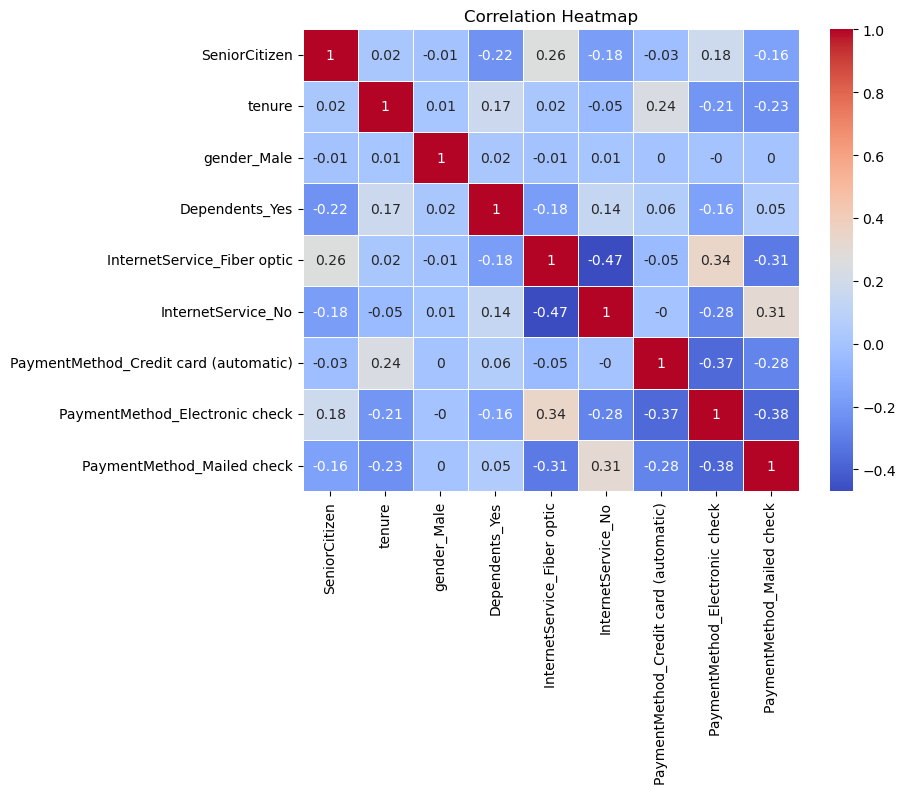

In [13]:
##-----------------------------------------------------------------------
##  2. Identify and and remove highly correlated columns
##-----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = X_train_encoded.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix.round(2), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [27]:
corr_matrix.to_excel('telco-corr.matrix.xlsx', index=False)

In [29]:
corr_matrix.round(2)

,SeniorCitizen,tenure,gender_Male,Dependents_Yes,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.00,0.02,-0.01,-0.22,0.26,-0.18,-0.03,0.18,-0.16
tenure,0.02,1.00,0.01,0.17,0.02,-0.05,0.24,-0.21,-0.23
gender_Male,-0.01,0.01,1.00,0.02,-0.01,0.01,0.00,-0.00,0.00
Dependents_Yes,-0.22,0.17,0.02,1.00,-0.18,0.14,0.06,-0.16,0.05
InternetService_Fiber optic,0.26,0.02,-0.01,-0.18,1.00,-0.47,-0.05,0.34,-0.31
InternetService_No,-0.18,-0.05,0.01,0.14,-0.47,1.00,-0.00,-0.28,0.31
PaymentMethod_Credit card (automatic),-0.03,0.24,0.00,0.06,-0.05,-0.00,1.00,-0.37,-0.28
PaymentMethod_Electronic check,0.18,-0.21,-0.00,-0.16,0.34,-0.28,-0.37,1.00,-0.38
PaymentMethod_Mailed check,-0.16,-0.23,0.00,0.05,-0.31,0.31,-0.28,-0.38,1.00


In [31]:
##-------------------------
##  Build the logit model
##-------------------------
import statsmodels.api as sm
##  Constant is to be added when using the sm library
X_train_encoded = sm.add_constant( X_train_encoded )
#Call Logistic regression with X and Y variables of the training data
# Model is built with the training data
logit = sm.Logit(y_train, X_train_encoded)
##  Fit the model and display results
logit_model = logit.fit()
print(logit_model.summary2())

Optimization terminated successfully.
         Current function value: 0.434223
         Iterations 7
                                    Results: Logit
Model:                      Logit                  Method:                 MLE        
Dependent Variable:         Churn                  Pseudo R-squared:       0.249      
Date:                       2024-10-07 21:34       AIC:                    4294.4947  
No. Observations:           4922                   BIC:                    4359.5094  
Df Model:                   9                      Log-Likelihood:         -2137.2    
Df Residuals:               4912                   LL-Null:                -2846.7    
Converged:                  1.0000                 LLR p-value:            6.4080e-300
No. Iterations:             7.0000                 Scale:                  1.0000     
--------------------------------------------------------------------------------------
                                       Coef.  Std.Err.    z     

In [33]:
#Only significant X-vars are used to build the predictive model.
#Select the significant variables
significant_vars = ['const','SeniorCitizen','tenure','Dependents_Yes','InternetService_Fiber optic','InternetService_No','PaymentMethod_Electronic check']
print(significant_vars)

['const', 'SeniorCitizen', 'tenure', 'Dependents_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'PaymentMethod_Electronic check']


In [35]:
##-------------------------------------------------------
##  Revise model to include only significant predictors
##-------------------------------------------------------
#final_logit holds the logistic regression equation aka -the model
#Only significant X-vars are used to build the predictive model
X_train_encoded = sm.add_constant(X_train_encoded)
final_logit_model = sm.Logit( y_train,X_train_encoded[significant_vars] ).fit()
print(final_logit_model.summary2())

Optimization terminated successfully.
         Current function value: 0.434293
         Iterations 7
                                Results: Logit
Model:                   Logit                Method:               MLE        
Dependent Variable:      Churn                Pseudo R-squared:     0.249      
Date:                    2024-10-07 21:35     AIC:                  4289.1808  
No. Observations:        4922                 BIC:                  4334.6911  
Df Model:                6                    Log-Likelihood:       -2137.6    
Df Residuals:            4915                 LL-Null:              -2846.7    
Converged:               1.0000               LLR p-value:          2.7707e-303
No. Iterations:          7.0000               Scale:                1.0000     
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------

In [37]:
##----------------------------
##  Apply model on test data
##----------------------------
X_test_encoded=sm.add_constant(X_test_encoded)
#Make sure only the significant variables in the test data are selected
X_test_sig_vars=X_test_encoded[significant_vars]
X_test_sig_vars
y_prob=final_logit_model.predict(X_test_sig_vars)
#y_prob holds the probability values for each record in the test data

In [39]:
y_prob

1173    0.284827
3591    0.028162
1074    0.281492
6718    0.161842
1030    0.103101
          ...   
2812    0.617833
5291    0.019662
3024    0.304852
6026    0.298575
1954    0.703417
Length: 2110, dtype: float64

In [41]:
#Create a dataframe to store the test data's Y value and the predicted probability value
#The original admit column is stored as "actual_Y"
#The predicted prob is stored in y_prob
y_pred_df = pd.DataFrame( { "actual_Y": y_test,
"predicted_prob":y_prob})

In [43]:
print(y_pred_df.head())

     actual_Y  predicted_prob
1173        0        0.284827
3591        1        0.028162
1074        0        0.281492
6718        1        0.161842
1030        0        0.103101


In [45]:
##---------------------------------
##  Based on default cut-off -0.5
##---------------------------------
y_pred_df['predicted_Y'] = y_pred_df.predicted_prob.map(
lambda x: 1 if x >= 0.5 else 0)
print(y_pred_df.head())

     actual_Y  predicted_prob  predicted_Y
1173        0        0.284827            0
3591        1        0.028162            0
1074        0        0.281492            0
6718        1        0.161842            0
1030        0        0.103101            0


In [47]:
from sklearn.metrics import confusion_matrix
# Generating the confusion matrix using the DataFrame columns
cm = confusion_matrix(y_pred_df['actual_Y'],y_pred_df['predicted_Y'])
print(cm)

[[1423  123]
 [ 306  258]]


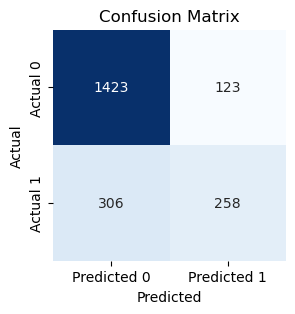

In [49]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [51]:
# Calculate Sensitivity (Recall), Specificity, and Accuracy using scikit-learn functions
from sklearn.metrics import  accuracy_score, recall_score, precision_score
sensitivity = recall_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])
accuracy = accuracy_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])

# Print metrics
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Sensitivity (Recall): 0.46
Accuracy: 0.80


In [53]:
from sklearn.metrics import confusion_matrix, classification_report
print("\nClassification Report:")
print(classification_report(y_pred_df['actual_Y'],y_pred_df['predicted_Y']))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1546
           1       0.68      0.46      0.55       564

    accuracy                           0.80      2110
   macro avg       0.75      0.69      0.71      2110
weighted avg       0.78      0.80      0.78      2110



### Implications/ Recommendations 

Accuracy: 80% ((TP+TN)/(TP+TN+FP+FN))
Sensitivity: 46% ((TP/(TP+FN))
Specificity: 92% ((TN/(TN+FP))

In [58]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

def compute_sensitivity_table(y_actual, y_prob, specific_thresholds=np.arange(0.1, 0.5, 0.01)):
    """
    This function computes and prints a table of sensitivity (TPR) values for specified thresholds (0.1 to 0.5).
    
    Parameters:
    y_actual: array-like
        The actual binary labels.
    y_prob: array-like
        The predicted probabilities for the positive class.
    specific_thresholds: array-like, optional
        The specific thresholds for which to compute sensitivity. Default is np.arange(0.1, 0.5, 0.01).
    """
    
    results = []  # List to store results for the table

    for threshold in specific_thresholds:
        # Convert predicted probabilities to binary predictions based on the threshold
        y_pred = (y_prob >= threshold).astype(int)
        
        # Get the confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_actual, y_pred).ravel()
        
        # Calculate TPR (Sensitivity)
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # Avoid division by zero
        
        # Append results
        results.append({'Threshold': threshold, 'Sensitivity (TPR)': tpr})

    # Create a DataFrame for better formatting
    sensitivity_table = pd.DataFrame(results)
    
    # Print the sensitivity table
    print(sensitivity_table)

In [60]:
compute_sensitivity_table(y_pred_df['actual_Y'], y_pred_df['predicted_prob'])

    Threshold  Sensitivity (TPR)
0        0.10           0.945035
1        0.11           0.929078
2        0.12           0.913121
3        0.13           0.909574
4        0.14           0.897163
5        0.15           0.877660
6        0.16           0.845745
7        0.17           0.836879
8        0.18           0.833333
9        0.19           0.829787
10       0.20           0.820922
11       0.21           0.812057
12       0.22           0.806738
13       0.23           0.799645
14       0.24           0.789007
15       0.25           0.776596
16       0.26           0.765957
17       0.27           0.755319
18       0.28           0.746454
19       0.29           0.737589
20       0.30           0.726950
21       0.31           0.718085
22       0.32           0.712766
23       0.33           0.705674
24       0.34           0.700355
25       0.35           0.689716
26       0.36           0.666667
27       0.37           0.632979
28       0.38           0.622340
29       0

### Business decision:

The threshold should be lowered to 0.13 for a sensitivity of atleast 90%.